### Install dependencies and Import libraries

In [ ]:
# Install all required libraries for the project
!pip install scikit-learn tensorflow pandas xgboost shap

# Import the necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import os

print("✅ Setup complete. Libraries are installed and imported successfully.")

# Initialize JavaScript for SHAP plots
shap.initjs()
from IPython.core.display import display, HTML
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.6/require.min.js'></script>"))
print("✅ SHAP JavaScript initialized for force plots.")

✅ Setup complete. Libraries are installed and imported successfully.


✅ SHAP JavaScript initialized for force plots.


The data contains 500 rows and 7 features

- `GRE Score`
- `TOEFL Score`
- `University Rating`
- `SOP` (Statement of Purpose)
- `LOR` (Letter of Recommendation)
- `CGPA` (Cumulative Grade Point Average)
- `Research` (Binary: Yes/No)



In [22]:
# --- Data Acquisition ---
# The file is uploaded to the Colab environment.
file_path = '/content/drive/MyDrive/admission_data.csv'

print("Loading admission data from:", file_path)
df = pd.read_csv(file_path)

print("Dataset loaded successfully. Here are the first 5 rows:")
print(df.head())

# --- Data Preprocessing ---
df.columns = df.columns.str.strip().str.replace(' ', '_')
X = df.drop(['Chance_of_Admit'], axis=1)
y = df['Chance_of_Admit']

# Ensure all features are numerical
X = X.astype('float32')

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame, preserving column names for SHAP
X = pd.DataFrame(X.copy(), columns=X.columns)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n✅ Data preprocessing complete.")
print(f"Shape of features (X): {X.shape}")
print(f"Features (X) columns: {X.columns.tolist()}")
print(f"Shape of training data (X_train): {X_train.shape}, (y_train): {y_train.shape}")
print(f"Shape of testing data (X_test): {X_test.shape}, (y_test): {y_test.shape}")

Loading admission data from: /content/drive/MyDrive/admission_data.csv
Dataset loaded successfully. Here are the first 5 rows:
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  

✅ Data preprocessing complete.
Shape of features (X): (500, 7)
Features (X) columns: ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research']
Shape of training data (X_train): (400, 7), (y_train): (400,)
Shape of testing data (X_test): (100, 7), (y_test): (100,)

🌲 **XGBoost Regressor (Extreme Gradient Boosting)**

XGBoost is an advanced implementation of gradient boosting that builds an ensemble of decision trees sequentially.
Unlike a single decision tree, XGBoost builds trees one after another, with each new tree correcting the errors
of the previous ones. This iterative approach creates a highly accurate and robust model.

**Why it's useful:** By correcting its own errors, XGBoost produces a much more accurate and robust prediction than a single Decision Tree. It is an extremely powerful and popular algorithm for tabular data, often winning machine learning competitions


--- XGBoost Model Training and SHAP Analysis ---
Starting XGBoost model training...

✅ XGBoost Model Training Complete. Mean Squared Error (MSE): 0.0052, R-squared: 0.7467

Generating SHAP plots for XGBoost...

XGBoost SHAP Summary Plot (Global Feature Importance):


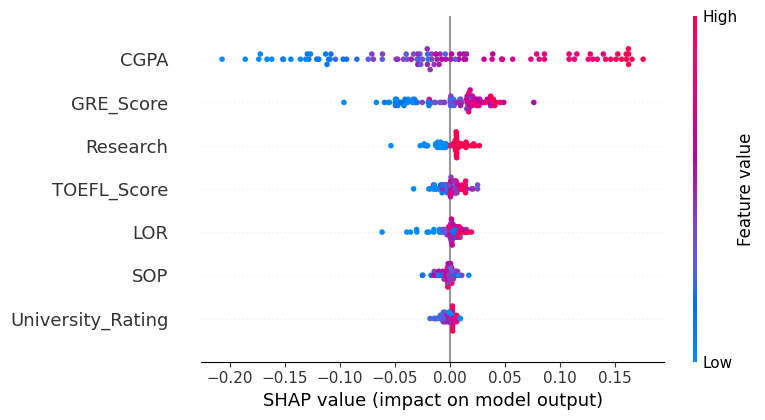


Explaining a specific prediction for XGBoost (Student at index 15):
Actual Chance of Admit: 0.4900
XGBoost Predicted Chance of Admit: 0.5699
XGBoost Base Value (Average Prediction): 0.7242

XGBoost SHAP Waterfall Plot (Individual Prediction Breakdown):


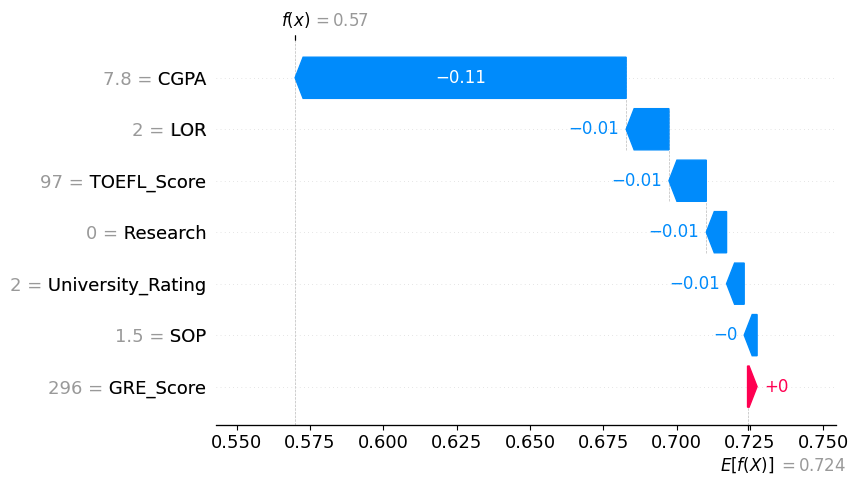


XGBoost SHAP Force Plot (Individual Prediction - Interactive):


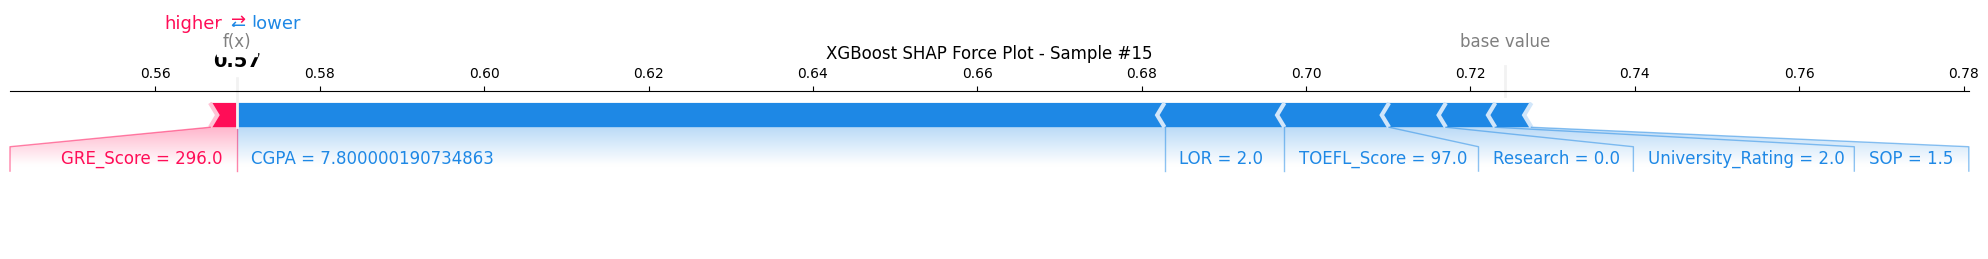

In [27]:
# --- Training XGBoost Model ---
print("\n--- XGBoost Model Training and SHAP Analysis ---")
print("Starting XGBoost model training...")
# 'objective=reg:squarederror' is standard for regression tasks in XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost Model Performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = xgb_model.score(X_test, y_test)
print(f"\n✅ XGBoost Model Training Complete. Mean Squared Error (MSE): {mse_xgb:.4f}, R-squared: {r2_xgb:.4f}")

# --- SHAP Analysis for XGBoost ---
print("\nGenerating SHAP plots for XGBoost...")
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)

# SHAP Summary Plot (Global Feature Importance)
print("\nXGBoost SHAP Summary Plot (Global Feature Importance):")
shap.summary_plot(xgb_shap_values, X_test, show=True)

# --- Specific Example Explanation for XGBoost ---
sample_index_xgb = 15
print(f"\nExplaining a specific prediction for XGBoost (Student at index {sample_index_xgb}):")
print(f"Actual Chance of Admit: {y_test.iloc[sample_index_xgb]:.4f}")
print(f"XGBoost Predicted Chance of Admit: {y_pred_xgb[sample_index_xgb]:.4f}")
print(f"XGBoost Base Value (Average Prediction): {xgb_explainer.expected_value:.4f}")

# SHAP Waterfall Plot (Individual Prediction Breakdown)
print("\nXGBoost SHAP Waterfall Plot (Individual Prediction Breakdown):")
shap.waterfall_plot(shap.Explanation(xgb_shap_values[sample_index_xgb, :],
                                     base_values=xgb_explainer.expected_value,
                                     data=X_test.iloc[sample_index_xgb, :].values,
                                     feature_names=X_test.columns.tolist()), show=True)

# SHAP Force Plot (Individual Prediction - Interactive)
print("\nXGBoost SHAP Force Plot (Individual Prediction - Interactive):")
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[sample_index_xgb, :],
                X_test.iloc[sample_index_xgb, :], matplotlib=True, show=False)
plt.title(f"XGBoost SHAP Force Plot - Sample #{sample_index_xgb}")
plt.tight_layout()
plt.show()

🌳 **Decision Tree Regressor**

A Decision Tree is a simple yet powerful model that makes predictions by learning
a series of if-then-else rules from the data. It splits the data into subsets based
on feature values, creating a tree-like structure of decisions.

Limitations:
- Prone to overfitting (capturing noise in the data)
- Can be unstable (small changes in data can create very different trees)
- Often less accurate than ensemble methods like XGBoost


--- Decision Tree Training and SHAP Analysis ---
Starting Decision Tree model training...

✅ Decision Tree Model Training Complete. Mean Squared Error (MSE): 0.0065, R-squared: 0.6828

Generating SHAP plots for Decision Tree...

Decision Tree SHAP Summary Plot (Global Feature Importance):


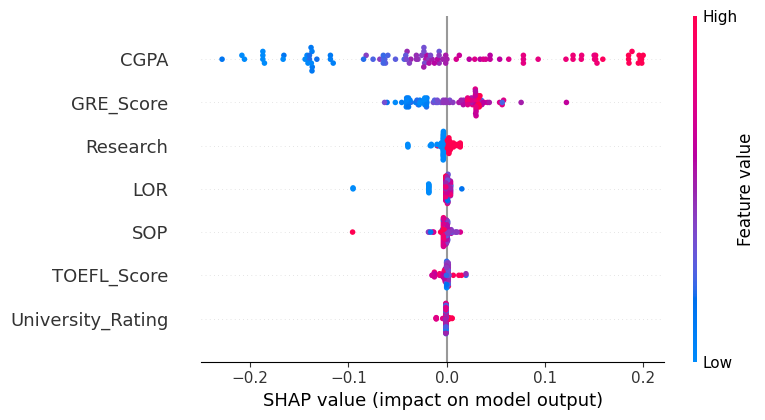


Explaining a specific prediction for Decision Tree (Student at index 10):
Actual Chance of Admit: 0.4500
Decision Tree Predicted Chance of Admit: 0.6633

Decision Tree SHAP Waterfall Plot (Individual Prediction Breakdown):


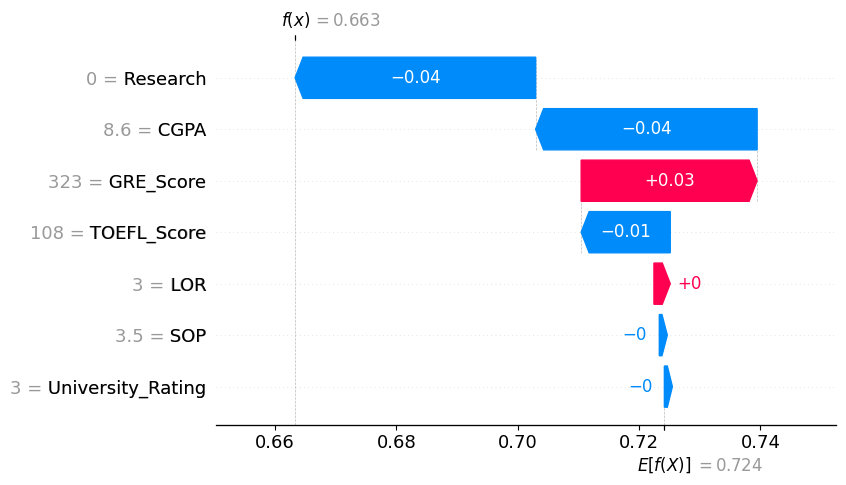


Decision Tree SHAP Force Plot (Individual Prediction - Interactive):


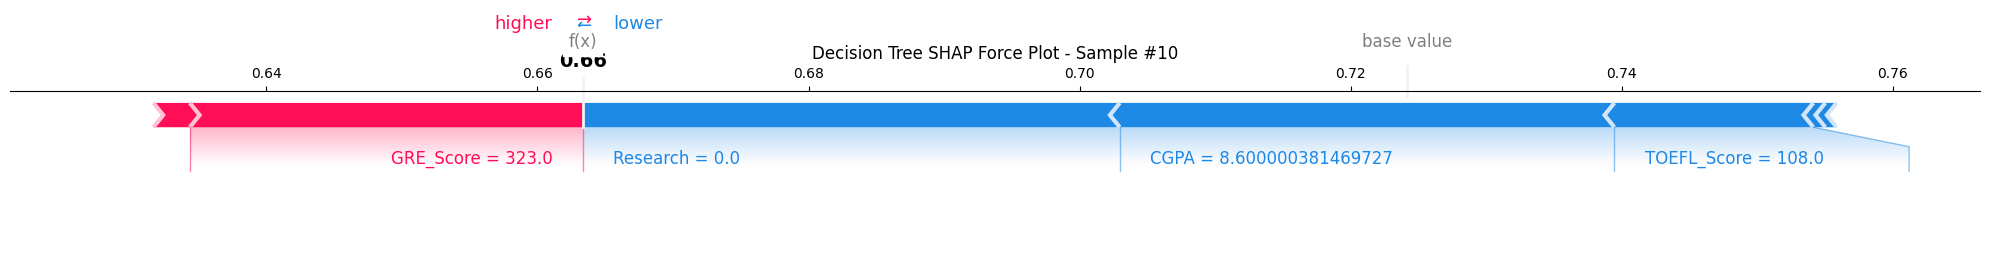

In [28]:
# --- Training Decision Tree Model ---
print("\n--- Decision Tree Training and SHAP Analysis ---")
print("Starting Decision Tree model training...")

# Initialize and train the Decision Tree Regressor
# We'll use a max_depth to prevent the model from becoming too complex and overfitting
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree Model Performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = dt_model.score(X_test, y_test)
print(f"\n✅ Decision Tree Model Training Complete. Mean Squared Error (MSE): {mse_dt:.4f}, R-squared: {r2_dt:.4f}")

# --- SHAP Analysis for Decision Tree ---
print("\nGenerating SHAP plots for Decision Tree...")

dt_explainer = shap.TreeExplainer(dt_model)
dt_shap_values = dt_explainer.shap_values(X_test)

# SHAP Summary Plot (Global Feature Importance)
print("\nDecision Tree SHAP Summary Plot (Global Feature Importance):")
shap.summary_plot(dt_shap_values, X_test, show=True)

# --- Specific Example Explanation for Decision Tree ---
# Pick the same sample index as for XGBoost for a direct comparison
sample_index_dt = 15
print(f"\nExplaining a specific prediction for Decision Tree (Student at index {sample_index_dt}):")
print(f"Actual Chance of Admit: {y_test.iloc[sample_index_dt]:.4f}")
print(f"Decision Tree Predicted Chance of Admit: {y_pred_dt[sample_index_dt]:.4f}")
# print(f"Decision Tree Base Value (Average Prediction): {dt_explainer.expected_value:.4f}")

# SHAP Waterfall Plot (Individual Prediction Breakdown)
print("\nDecision Tree SHAP Waterfall Plot (Individual Prediction Breakdown):")
# We use the same format as the XGBoost waterfall plot
shap.waterfall_plot(shap.Explanation(dt_shap_values[sample_index_dt, :],
                                     base_values=dt_explainer.expected_value,
                                     data=X_test.iloc[sample_index_dt, :].values,
                                     feature_names=X_test.columns.tolist()), show=True)

# SHAP Force Plot (Individual Prediction - Interactive)
print("\nDecision Tree SHAP Force Plot (Individual Prediction - Interactive):")
shap.force_plot(dt_explainer.expected_value, dt_shap_values[sample_index_dt, :],
                X_test.iloc[sample_index_dt, :], matplotlib=True, show=False)
plt.title(f"Decision Tree SHAP Force Plot - Sample #{sample_index_dt}")
plt.tight_layout()
plt.show()

**Performance Comparison and Visualization** 📈

Scatter plots provide a visual way to compare model performance by showing how closely
predictions align with actual values. A perfect model would have all points on the red line.

Interpretation
- Points close to the red line: Accurate predictions
- Points far from the red line: Prediction errors
- Clustering pattern: Shows if errors are systematic or random
- Spread of points: Indicates prediction consistency

Why it's useful:
- Visualizes model accuracy beyond numerical metrics
- Helps identify patterns in prediction errors
- Allows comparison between different models


--- Performance Comparison: Actual vs. Predicted Ratings ---


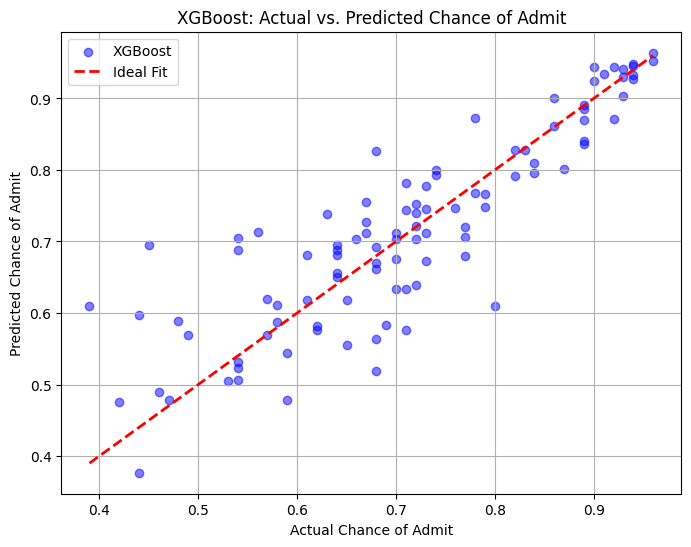

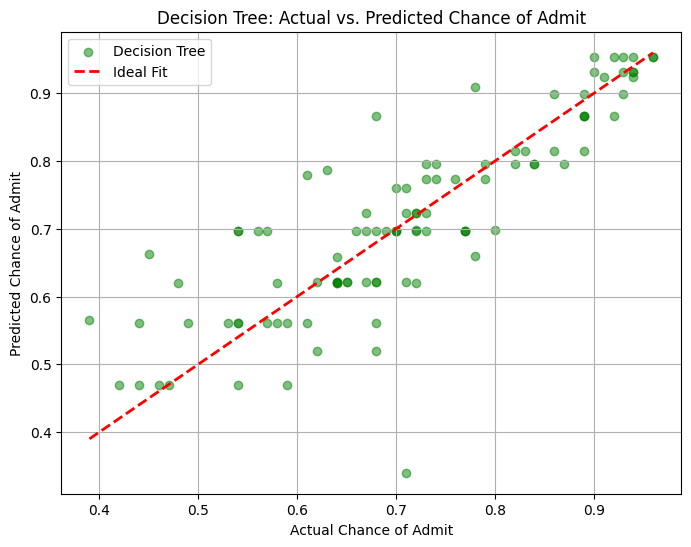


✅ All code segments executed successfully.


In [26]:
# --- Performance Evaluation: Scatter Plots ---
print("\n--- Performance Comparison: Actual vs. Predicted Ratings ---")

# Scatter plot for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost', color='blue')
# Add an ideal line where actual ratings equal predicted ratings
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.title('XGBoost: Actual vs. Predicted Chance of Admit')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, label='Decision Tree', color='green')
# Add an ideal line where actual ratings equal predicted ratings
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.title('Decision Tree: Actual vs. Predicted Chance of Admit')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.legend()
plt.grid(True)
plt.show()

print("\n✅ All code segments executed successfully.")

### Visualize Feature Contributions as a Combined Bar Plot

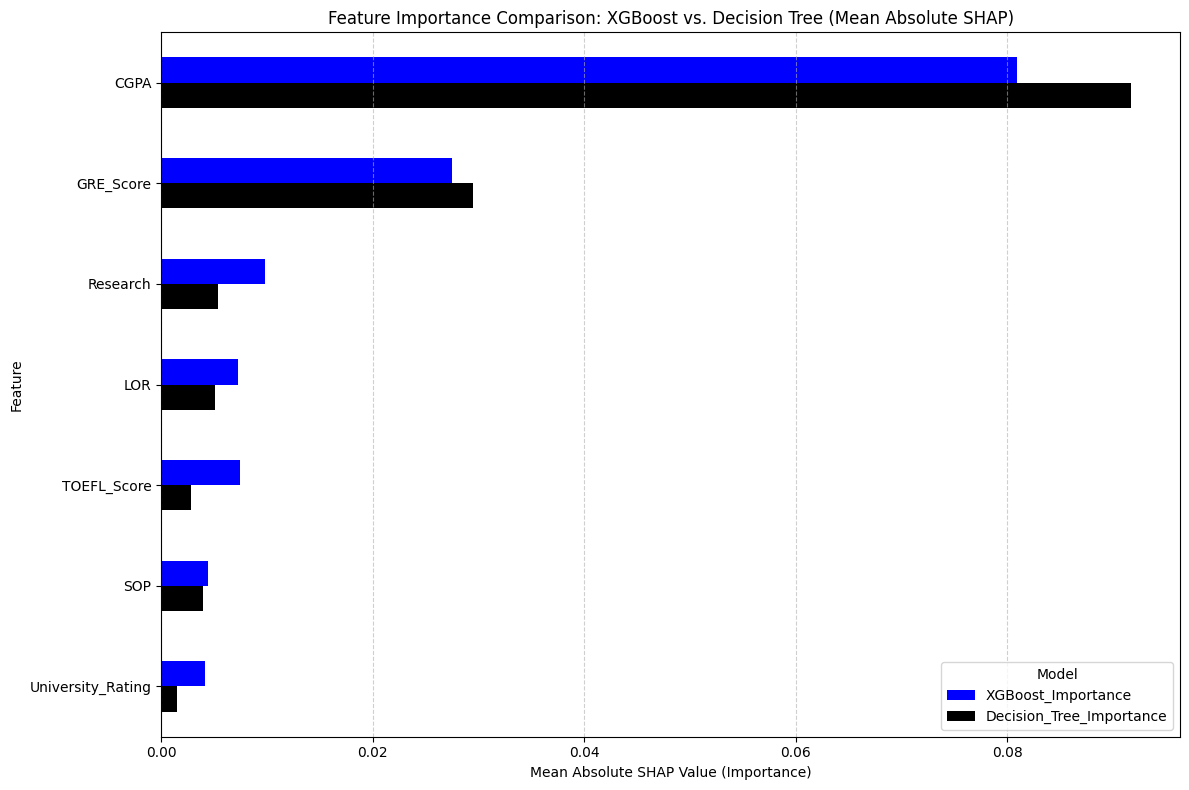


✅ Combined feature importance bar plot generated.


In [25]:

# Combine the importance dataframes
combined_importance_df = xgb_importance_df.rename(columns={'Importance': 'XGBoost_Importance'}).set_index('Feature')
combined_importance_df['Decision_Tree_Importance'] = dt_importance_df.set_index('Feature')['Importance']

# Sort by the mean importance or one of the model's importance for consistency
combined_importance_df['Mean_Importance'] = combined_importance_df[['XGBoost_Importance', 'Decision_Tree_Importance']].mean(axis=1)
combined_importance_df = combined_importance_df.sort_values(by='Mean_Importance', ascending=False)

# Plotting the combined bar plot
ax = combined_importance_df[['XGBoost_Importance', 'Decision_Tree_Importance']].plot(kind='barh', figsize=(12, 8), color=['blue', 'black'])
plt.xlabel('Mean Absolute SHAP Value (Importance)')
plt.ylabel('Feature')
plt.title('Feature Importance Comparison: XGBoost vs. Decision Tree (Mean Absolute SHAP)')
plt.gca().invert_yaxis() # Invert y-axis to have the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

print("\n✅ Combined feature importance bar plot generated.")